# Author: Shantanu Tyagi
# Date: 24-02-2021
# ID: 201801015

## Question 1

### We read the CSV files and plot the scatter plot. Next we perform linear regression to fir the scatter plot data to a straight line. After linear regression we get the slope and intercept of the line which best fits the scatter plot data. It is shown in the figure given below along with the correlation coefficients.

In [109]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
from scipy import stats

# Column Name
name1 = "AirTime"
name2 = "Distance"

# Reading CSV
df = pd.read_csv('2008.csv', usecols=[name1, name2])
df = df.dropna(subset=[name1, name2]) 

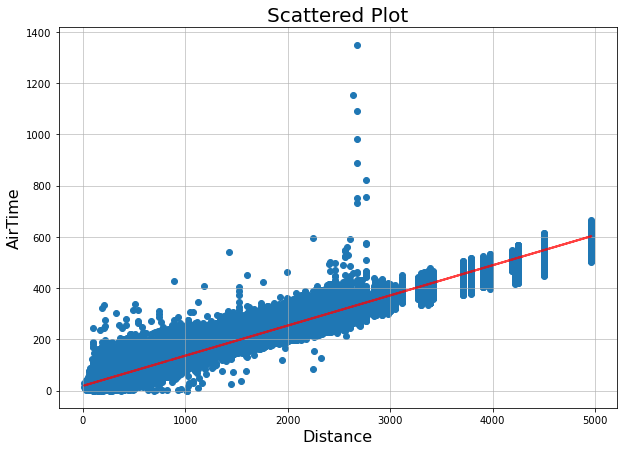

r   : 0.9828758232165342
r^2 : 0.9660448838635798

Slope: 0.11768409248619761
Intercept: 18.257032395291716


In [110]:
# Dataframes
df1 = df[name1]
df2 = df[name2]

plt.figure(figsize=(10, 7))
plt.scatter(df2, df1)
slope, intercept, r_value, p_value, std_err = stats.linregress(df2, df1)
x = df2
y = slope*df2 + intercept
plt.plot(x,y, 'r', alpha=0.75, linewidth = 2)
plt.title('Scattered Plot', fontsize=20)
plt.xlabel(name2, fontsize=16)
plt.ylabel(name1, fontsize=16)
plt.grid(alpha=0.75)
plt.show()

print('r   : ' + str(r_value))
print('r^2 : ' + str(r_value*r_value))
print()
print("Slope: "+ str(slope))
print("Intercept: "+ str(intercept))

### Next, we find the Root Mean Squared Error between the actyal data value and the value predicted by the regression line.

In [111]:
err = pow(df1-y,2)
rmse = math.sqrt((err.to_frame()).sum()/len(err))
print("RMSE: " + str(rmse))

RMSE: 12.427072327524876


### In statistics, simple linear regression is a linear regression model with a single explanatory variable. That is, it concerns two-dimensional sample points with one independent variable and one dependent variable (conventionally, the x and y coordinates in a Cartesian coordinate system) and finds a linear function (a non-vertical straight line) that, as accurately as possible, predicts the dependent variable values as a function of the independent variable. The adjective simple refers to the fact that the outcome variable is related to a single predictor. It is common to make the additional stipulation that the ordinary least squares (OLS) method should be used: the accuracy of each predicted value is measured by its squared residual (vertical distance between the point of the data set and the fitted line), and the goal is to make the sum of these squared deviations as small as possible. To build simple linear regression model, we hypothesize that the relationship between dependent and independent variable is linear, formally: Y = m*X + c

## Question 2

In [112]:
print('When x = 1200, y = '+str(slope*1200 + intercept))

When x = 1200, y = 159.47794337872887


### We find the 95% confidence interval in the slope of linear regression using library function as shown below

In [113]:
import statsmodels.api as sm
mod = sm.OLS(df1.to_numpy(), sm.add_constant(df2.to_numpy()))
res = mod.fit()
print(res.conf_int(0.05)[1])

[0.11766758 0.11770061]


### We verify this data by finding the 95% confidence interval by sing the standard error value which we previously got as the output of the linear regression function. We see that the values calculated match.

In [114]:
low = slope - std_err * 1.96
high = slope + std_err * 1.96
print('low: '+str(low))
print('high: '+str(high))

low: 0.11766757578900149
high: 0.11770060918339374


### The slope of the regression line is a very important part of regression analysis, by finding the slope we get an estimate of the value by which the dependent variable is expected to increase or decrease. But the confidence interval provides the range of the slope values that we expect 95% of the times when the sample size is same. Since the slope represents how much Y responds to changes in the X-value, we will calculate a 95% confidence interval for the slope, and examine whether it excludes 0. If it does, then we can rule out the likelihood that the slope is 0. Thus, we conclude that there is a significant linear relationship between X and Y like we see in our case.
![alt text](ss.png "Title")

## Question 3

### Next we find the weights that will be assigned to the sata pooints in the bi-weighted robust method and then we repeat the procedure we followed in Question 1 and get a reduced value for RMSE.

In [115]:
d = df1 - y
q1 = d.quantile(0.25)
q3 = d.quantile(0.75)
s = q3 - q1
u = np.array(d/(3*s))
w = np.zeros(u.size)
for i in range(w.size):
    if u[i] <= int(1):
        w[i] = (1 - u[i]**2)**2

In [116]:
df11 = np.array(df1)
df22 = np.array(df2)
for i in range(df2.size):
    df11[i] = df11[i] * np.sqrt(w[i])
    df22[i] = df22[i] * np.sqrt(w[i])
df11 = pd.Series(df11)
df22 = pd.Series(df22)

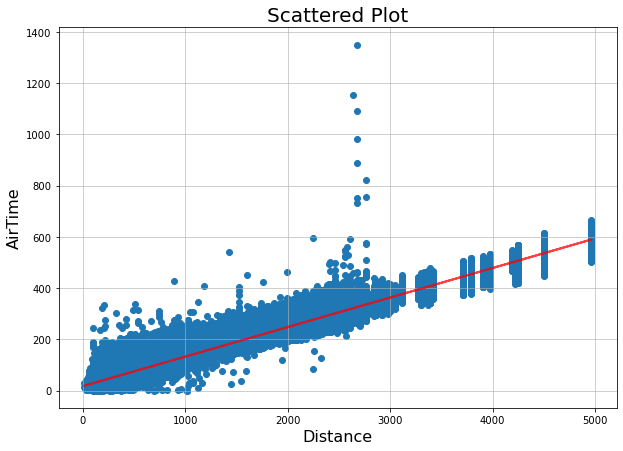

Slope: 0.11527990541599192
Intercept: 17.140506885689604

RMSE: 9.060842357379537


In [117]:
plt.figure(figsize=(10, 7))
plt.scatter(df2, df1)
slope, intercept, r_value, p_value, std_err = stats.linregress(df22, df11)
x = df2
y = slope*df2 + intercept
plt.plot(x,y, 'r', alpha=0.75, linewidth = 2)
plt.title('Scattered Plot', fontsize=20)
plt.xlabel(name2, fontsize=16)
plt.ylabel(name1, fontsize=16)
plt.grid(alpha=0.75)
plt.show()
print("Slope: "+ str(slope))
print("Intercept: "+ str(intercept))
x = df22
y = slope*df22 + intercept
err = pow(df11-y,2)
rmse = math.sqrt((err.to_frame()).sum()/len(err))
print()
print("RMSE: " + str(rmse))

### In a linear regression model, the ordinary least squares (OLS) method is considered the best method to estimate the regression parameters if the assumptions are met. However, if the data does not satisfy the underlying assumptions, the results will be misleading. The violation for the assumption of constant variance in the least squares regression is caused by the presence of outliers and heteroscedasticity in the data. This assumption of constant variance (homoscedasticity) is very important in linear regression in which the least squares estimators enjoy the property of minimum variance. Therefor e robust regression method is required to handle the problem of outlier in the data. However, this research will use the weighted least square techniques to estimate the parameter of regression coefficients when the assumption of error variance is violated in the data. Estimation of WLS is the same as carrying out the OLS in a transformed variables procedure. The WLS can easily be affected by outliers. To remedy this, We have suggested a strong technique for the estimation of regression parameters in the existence of heteroscedasticity and outliers. This new approach is called “penalized weighted least squares” (PWLS). By assigning each observation an individual weight and incorporating a lasso-type penalty on the log-transformation of the weight vector, the PWLS is able to perform outlier detection and robust regression simultaneously.